# **Before running, please make sure to reset the runtime space. By going into Runtime -> reset runtime and run all, the code should run perfectly. The data was mounted into my drive.

# **If you'd like to test the data yourself please make sure to upload the files into the drive first.**


#Data load, view. Some analysis on rows & columns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

In [ ]:
data_files = [
    '/content/drive/MyDrive/Monday-WorkingHours.pcap_ISCX.csv',
    '/content/drive/MyDrive/Tuesday-WorkingHours.pcap_ISCX.csv',
    '/content/drive/MyDrive/Wednesday-workingHours.pcap_ISCX.csv',
    '/content/drive/MyDrive/Friday-WorkingHours-Morning.pcap_ISCX.csv',
    '/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
]

In [ ]:
data_frames = [] # Use a list to store all loaded dataframesprint('Data dimensions')
print('Data dimensions of individual files:')
for i, file_path in enumerate(data_files, start=1):
    temp_df = pd.read_csv(file_path)
    rows, cols = temp_df.shape
    print(f'Data{i} ({file_path.split("/")[-1]}) -> {rows} rows, {cols} columns')
    data_frames.append(temp_df)

Data dimensions of individual files:
Data1 (Monday-WorkingHours.pcap_ISCX.csv) -> 529918 rows, 79 columns
Data2 (Tuesday-WorkingHours.pcap_ISCX.csv) -> 445909 rows, 79 columns
Data3 (Wednesday-workingHours.pcap_ISCX.csv) -> 692703 rows, 79 columns
Data4 (Friday-WorkingHours-Morning.pcap_ISCX.csv) -> 191033 rows, 79 columns
Data5 (Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv) -> 225745 rows, 79 columns


In [ ]:
# Concatenate all dataframes into a single, combined DataFrame
combined_data = pd.concat(data_frames, ignore_index=True)
print(f'\nCombined Data dimensions: {combined_data.shape[0]} rows, {combined_data.shape[1]} columns')



Combined Data dimensions: 2085308 rows, 79 columns


In [ ]:
# Deleting individual dataframes from memory after concatenation
for df in data_frames:
    del df
del data_frames


In [ ]:
col_names = {col: col.strip() for col in combined_data.columns}
combined_data.rename(columns=col_names, inplace=True)

In [ ]:
combined_data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [ ]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085308 entries, 0 to 2085307
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  

In [ ]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
combined_data.describe().transpose()

Overview of Columns:


,count,mean,std,min,25%,50%,75%,max
Destination Port,2085308.0,8.072699e+03,1.875269e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2085308.0,1.707182e+07,3.550537e+07,-1.200000e+01,203.000000,50553.000000,5.473559e+06,1.200000e+08
Total Fwd Packets,2085308.0,1.013252e+01,8.118053e+02,1.000000e+00,2.000000,2.000000,6.000000e+00,2.197590e+05
Total Backward Packets,2085308.0,1.129216e+01,1.079849e+03,0.000000e+00,1.000000,2.000000,5.000000e+00,2.919220e+05
Total Length of Fwd Packets,2085308.0,5.897296e+02,6.023334e+03,0.000000e+00,24.000000,66.000000,3.330000e+02,2.428415e+06
Total Length of Bwd Packets,2085308.0,1.811499e+04,2.443043e+06,0.000000e+00,0.000000,157.000000,1.535000e+03,6.554530e+08
Fwd Packet Length Max,2085308.0,2.374787e+02,7.974731e+02,0.000000e+00,6.000000,40.000000,2.110000e+02,2.482000e+04
Fwd Packet Length Min,2085308.0,1.975129e+01,6.774885e+01,0.000000e+00,0.000000,0.000000,3.700000e+01,2.325000e+03
Fwd Packet Length Mean,2085308.0,6.598331e+01,2.078576e+02,0.000000e+00,6.000000,37.000000,5.200000e+01,5.940857e+03
Fwd Packet Length Std,2085308.0,8.066900e+01,3.171997e+02,0.000000e+00,0.000000,0.000000,7.701495e+01,7.125597e+03


In [ ]:
pd.options.display.max_columns = 80
combined_data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2085303,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.639344e+04,16393.44262,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2085304,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.388889e+04,13888.88889,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2085305,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,2.666667e+04,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.333333e+04,13333.33333,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2085306,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,4.166667e+04,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,4.166667e+04,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


# performing Data-Cleaning ...

Finding and dropping duplicates to avoid data leakage   -->

In [ ]:
dups = combined_data[combined_data .duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 163720


In [ ]:
combined_data.drop_duplicates(inplace = True)
combined_data.shape

(1921588, 79)

Dealing with missing values, identify then replace.

In [ ]:
missing_val = combined_data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow Bytes/s    304
dtype: int64


In [ ]:
# Checking for infinity values
numeric_cols = combined_data.select_dtypes(include = np.number).columns
inf_count = np.isinf(combined_data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Flow Bytes/s      649
Flow Packets/s    953
dtype: int64


In [ ]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {combined_data.isna().sum().sum()}')
combined_data.replace([np.inf, -np.inf], np.nan, inplace = True)
print(f'Missing values after processing infinite values: {combined_data.isna().sum().sum()}')

Initial missing values: 304
Missing values after processing infinite values: 1906


In [ ]:
missing = combined_data.isna().sum()
print(missing.loc[missing > 0])

Flow Bytes/s      953
Flow Packets/s    953
dtype: int64


In [ ]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(combined_data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

                Missing Values  Percentage of Total Values
Flow Bytes/s               953                        0.05
Flow Packets/s             953                        0.05


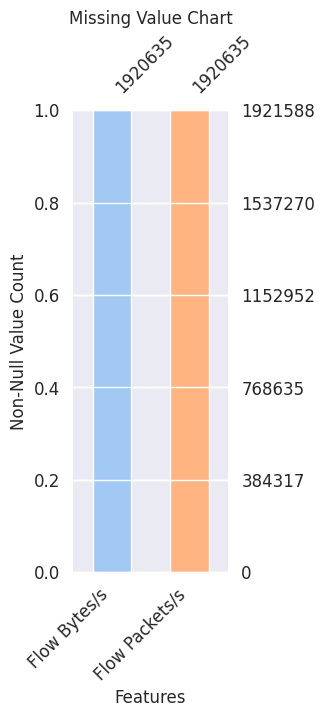

In [ ]:
#Visualization to help dealing with missing values
sns.set_palette('pastel')
colors = sns.color_palette()

missing_vals = [col for col in combined_data.columns if combined_data[col].isna().any()]

fig, ax = plt.subplots(figsize = (2, 6))
msno.bar(combined_data[missing_vals], ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize = 12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
plt.show()

In [ ]:
med_flow_bytes = combined_data['Flow Bytes/s'].median()
med_flow_packets = combined_data['Flow Packets/s'].median()

print('Median of Flow Bytes/s: ', med_flow_bytes)
print('Median of Flow Packets/s: ', med_flow_packets)

Median of Flow Bytes/s:  2637.137722
Median of Flow Packets/s:  63.3573035132


In [ ]:
# Filling missing values with median
combined_data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
combined_data['Flow Packets/s'].fillna(med_flow_packets, inplace = True)

/tmp/ipython-input-21-4086673939.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['Flow Bytes/s'].fillna(med_flow_bytes, inplace = True)
/tmp/ipython-input-21-4086673939.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [ ]:
print('Number of \'Flow Bytes/s\' missing values:', combined_data['Flow Bytes/s'].isna().sum())
print('Number of \'Flow Packets/s\' missing values:', combined_data['Flow Packets/s'].isna().sum())

Number of 'Flow Bytes/s' missing values: 0
Number of 'Flow Packets/s' missing values: 0


**Mapping all(DDOS-LIKE) attacks to one**

In [ ]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
combined_data['Attack Type'] = combined_data['Label'].map(attack_map)

In [ ]:
combined_data['Attack Type'].value_counts()

,count
Attack Type,
BENIGN,1588708
DoS,193748
DDoS,128016
Brute Force,9152
Bot,1953


In [ ]:
combined_data.drop('Label', axis = 1, inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
combined_data['Attack Number'] = le.fit_transform(combined_data['Attack Type'])

print(combined_data['Attack Number'].unique())

[0 2 4 5 1 3]


In [ ]:
# Printing corresponding attack type for each encoded value
encoded_values = combined_data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: nan


#Heat Map - build up

In [ ]:
corr = combined_data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Attack Number
Destination Port,1.00,-0.18,-0.00,-0.00,0.02,-0.00,0.12,-0.03,0.17,0.15,-0.23,-0.26,-0.25,-0.21,0.07,0.38,-0.12,-0.14,-0.14,-0.03,-0.18,-0.11,-0.12,-0.14,-0.06,-0.11,-0.07,-0.04,-0.05,-0.06,0.25,nan,nan,nan,0.00,0.00,0.36,0.16,-0.25,-0.15,-0.18,-0.15,-0.09,-0.05,0.25,-0.01,-0.23,0.58,0.54,nan,-0.01,0.05,-0.18,0.17,-0.25,0.00,nan,nan,nan,nan,nan,nan,-0.00,0.02,-0.00,-0.00,-0.14,0.24,-0.00,0.00,-0.04,-0.05,-0.06,-0.02,-0.14,0.01,-0.13,-0.14,-0.20
Flow Duration,-0.18,1.00,0.02,0.02,0.10,0.02,0.24,-0.12,0.13,0.21,0.49,-0.26,0.46,0.44,-0.03,-0.11,0.55,0.76,0.81,0.06,1.00,0.56,0.75,0.81,0.20,0.78,0.40,0.51,0.57,0.20,-0.03,nan,nan,nan,-0.00,-0.00,-0.10,-0.07,-0.26,0.51,0.42,0.45,0.28,0.24,-0.03,0.01,0.18,0.05,-0.12,nan,0.01,-0.17,0.40,0.13,0.46,-0.00,nan,nan,nan,nan,nan,nan,0.02,0.10,0.02,0.02,0.07,-0.05,0.01,-0.00,0.18,0.22,0.28,0.12,0.79,0.25,0.80,0.76,0.43
Total Fwd Packets,-0.00,0.02,1.00,1.00,0.62,1.00,0.01,-0.00,-0.00,0.00,0.02,-0.01,0.02,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,nan,nan,0.00,0.01,-0.00,-0.00,-0.01,0.02,0.02,0.01,0.00,-0.00,0.00,0.00,0.01,0.00,-0.00,nan,0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.62,1.00,1.00,0.00,-0.00,0.87,-0.00,0.04,0.01,0.03,0.05,0.00,0.00,0.00,0.00,-0.00
Total Backward Packets,-0.00,0.02,1.00,1.00,0.61,1.00,0.01,-0.00,-0.00,0.00,0.02,-0.01,0.02,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,nan,nan,0.00,0.01,-0.00,-0.00,-0.01,0.02,0.02,0.01,0.00,-0.00,0.00,0.00,0.01,0.00,-0.00,nan,0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.61,1.00,1.00,0.00,-0.00,0.86,0.00,0.04,0.01,0.03,0.05,0.00,0.00,0.00,0.00,-0.00
Total Length of Fwd Packets,0.02,0.10,0.62,0.61,1.00,0.61,0.34,-0.01,0.30,0.28,0.03,-0.05,0.02,0.01,0.00,-0.02,0.00,0.02,0.04,-0.01,0.10,0.01,0.04,0.04,-0.01,0.13,0.01,0.06,0.07,-0.01,0.01,nan,nan,nan,-0.00,0.01,-0.02,-0.01,-0.05,0.12,0.12,0.09,0.06,-0.01,0.01,0.01,0.09,-0.01,-0.00,nan,0.01,-0.02,0.11,0.30,0.02,-0.00,nan,nan,nan,nan,nan,nan,0.62,1.00,0.61,0.61,0.05,0.02,0.70,-0.00,0.17,0.15,0.20,0.12,0.03,0.05,0.04,0.03,-0.03
Total Length of Bwd Packets,-0.00,0.02,1.00,1.00,0.61,1.00,0.01,-0.00,-0.00,-0.00,0.02,-0.00,0.02,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.02,-0.00,-0.00,-0.00,-0.00,0.02,-0.00,-0.00,0.00,-0.00,0.00,nan,nan,nan,0.00,0.01,-0.00,-0.00,-0.00,0.02,0.02,0.01,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,nan,0.00,0.00,0.02,-0.00,0.02,0.00,nan,nan,nan,nan,nan,nan,1.00,0.61,1.00,1.00,0.00,-0.00,0.86,0.00,0.04,0.00,0.03,0.05,0.00,-0.00,0.00,0.00,-0.00
Fwd Packet Length Max,0.12,0.24,0.01,0.01,0.34,0.01,1.00,-0.00,0.90,0.97,0.05,-0.14,0.04,0.0

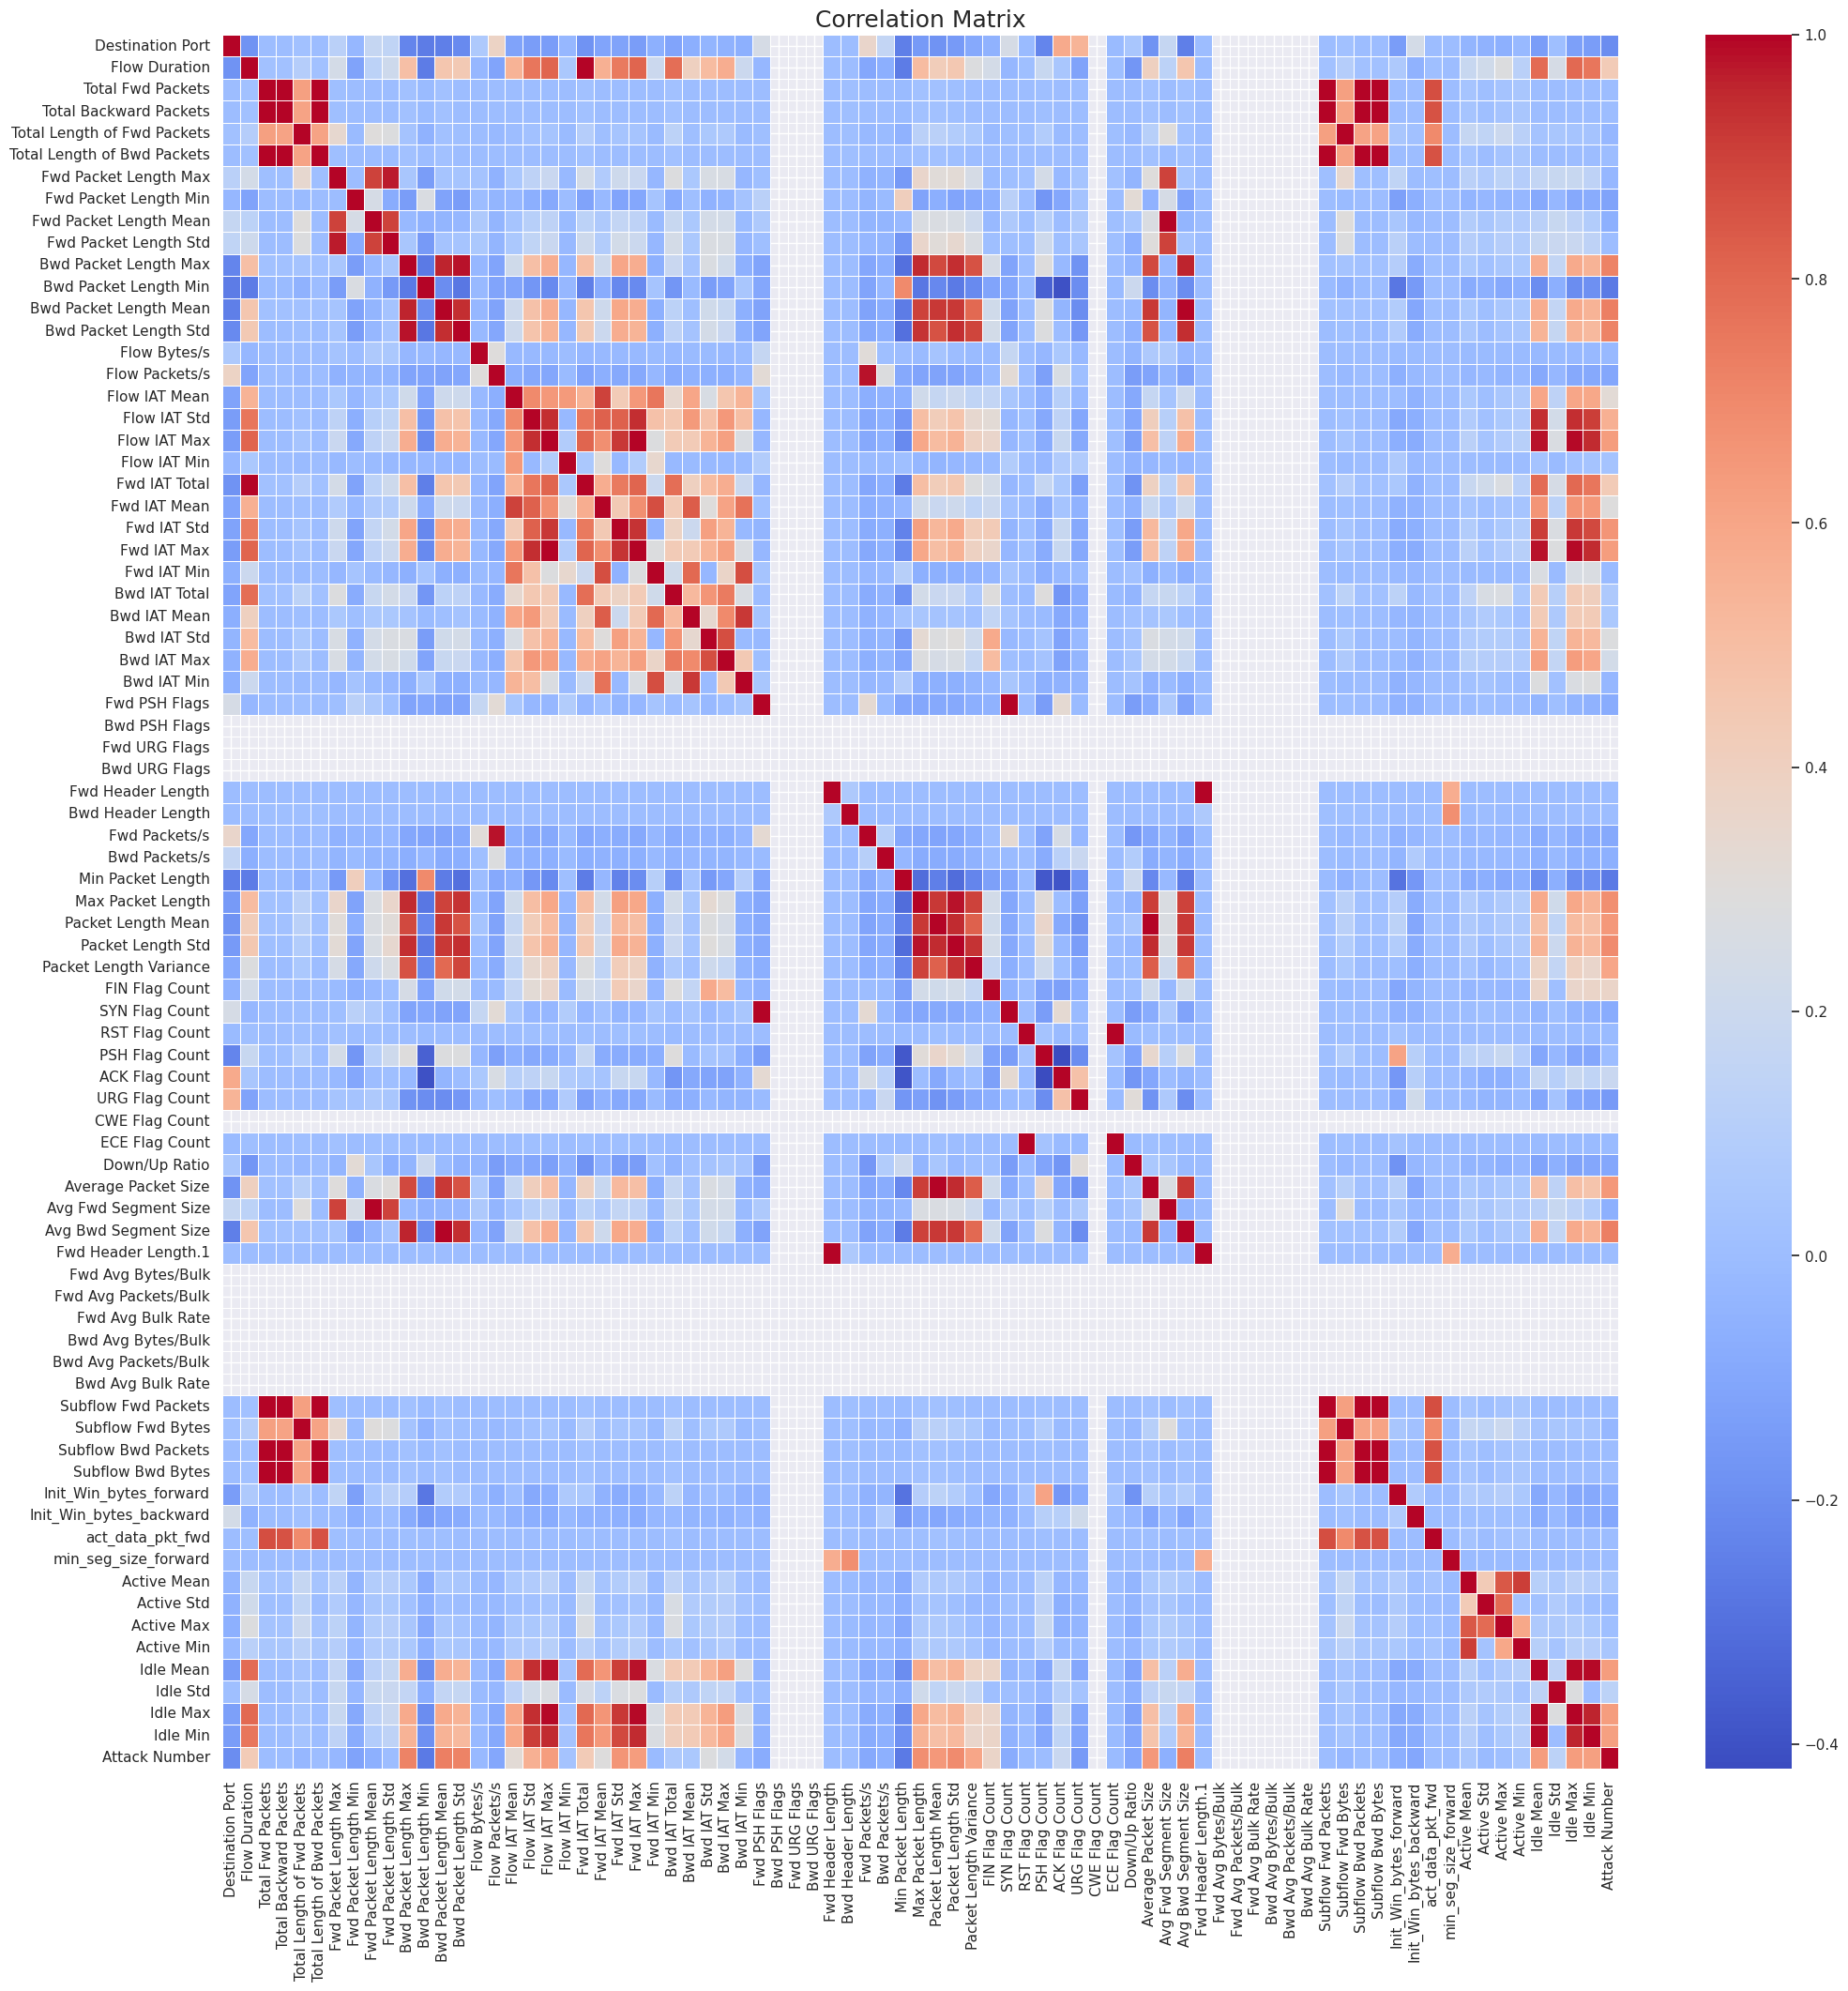

In [ ]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [ ]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Flow Duration            :0.43
2.  Bwd Packet Length Max    :0.72
3.  Bwd Packet Length Mean   :0.73
4.  Bwd Packet Length Std    :0.72
5.  Flow IAT Mean            :0.32
6.  Flow IAT Std             :0.56
7.  Flow IAT Max             :0.63
8.  Flow IAT Min             :0.03
9.  Fwd IAT Total            :0.43
10. Fwd IAT Mean             :0.29
11. Fwd IAT Std              :0.66
12. Fwd IAT Max              :0.63
13. Bwd IAT Total            :0.07
14. Bwd IAT Mean             :0.06
15. Bwd IAT Std              :0.28
16. Bwd IAT Max              :0.23
17. Max Packet Length        :0.68
18. Packet Length Mean       :0.65
19. Packet Length Std        :0.69
20. Packet Length Variance   :0.6
21. FIN Flag Count           :0.37
22. ACK Flag Count           :0.19
23. Average Packet Size      :0.65
24. Avg Bwd Segment Size     :0.73
25. Active Mean              :0.05
26. Active Max               :0.01
27. Active Min               :0.0

The previous Cell was done to only deepen our understanding of the features and how relevant each feature is, maybe for future developement. I will stick to the feature used in the Research paper.

In [ ]:
pos_corr_features = ["Fwd Packet Length Mean",  "Avg Fwd Segment Size", "Init_Win_bytes_forward", "Init_Win_bytes_backward", "min_seg_size_forward"]

In [ ]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 5


In [ ]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = combined_data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Fwd URG Flags',
 'Bwd URG Flags',
 'CWE Flag Count',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

We assigned each label to its respective attack type. This groups similar attacks under a common category, making it easier to analyze the dataset and identify patterns across different attack types.

To visualize relationships between features, we encoded the Attack Type column and generated a heatmap of the correlation matrix. From this heatmap, we can see that many feature pairs are highly correlated. High correlation among features can be problematic because it may lead to overfitting. A positive correlation means that when one variable increases, the other also increases (or they decrease together). We identified 32 features with strong positive correlations that could help predict the target variable.

Additionally, columns with zero standard deviation contain the same value for all rows. These columns have no variance and therefore show no meaningful relationship with other features, resulting in a NaN correlation coefficient. Such columns do not help distinguish between different classes or groups in the data, so they do not contribute to the correlation matrix and appear blank in the heatmap. This insight is useful for preprocessing because it suggests that columns with no variation can be dropped to simplify the dataset.


# Balance Data, Run Random Forest, KNN and logisitc regresison.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA


In [ ]:
#  Create balanced binary dataset — keep this part
normal_traffic = combined_data.loc[combined_data['Attack Type'] == 'BENIGN']
intrusions = combined_data.loc[combined_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n=len(intrusions), replace=True)
ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where(ids_data['Attack Type'] == 'BENIGN', 0, 1)
bc_data = ids_data.sample(n=30000)

print(bc_data['Attack Type'].value_counts())

Attack Type
1    15202
0    14798
Name: count, dtype: int64


In [ ]:
#Drop any leakage columns
X = bc_data.drop(['Attack Type', 'Attack Number'], axis=1, errors='ignore')
y = bc_data['Attack Type']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
#Scale train only, then transform test
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Fit PCA on train only, transform both
size = X.shape[1] // 2
ipca = IncrementalPCA(n_components=size, batch_size=500)
ipca.fit(X_train_scaled)

X_train_pca = ipca.transform(X_train_scaled)
X_test_pca = ipca.transform(X_test_scaled)

print(f"Information retained: {sum(ipca.explained_variance_ratio_):.2%}")

Information retained: 99.94%


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#  Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42)
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)
print("\nRandom Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#  KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_knn = knn.predict(X_test_pca)
print("\nKNN:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

#  Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000, C=0.1, random_state=42, solver='saga')
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_test_pca)
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))




Random Forest:
Accuracy: 0.9720
[[2887   73]
 [  95 2945]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2960
           1       0.98      0.97      0.97      3040

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000


KNN:
Accuracy: 0.9928
[[2936   24]
 [  19 3021]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2960
           1       0.99      0.99      0.99      3040

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000


Logistic Regression:
Accuracy: 0.9583
[[2813  147]
 [ 103 2937]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2960
           1       0.95      0.97      0.96      3040

    ac